# Explanatory Data Analysis
by Grace

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Load Dataset:

In [5]:
import json

data1 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        data1.append(json.loads(line.strip()))

data2 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        data2.append(json.loads(line.strip()))

data3 = []
# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 1
        data3.append(dict)
# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 2
        data3.append(dict)

In [6]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Separate the text and labels
#X = pd.DataFrame(df1['text'].tolist())
#y = df1['label']

In [25]:
df3

text  label  domain  model
0      [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...      1       1    NaN
1      [1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...      1       1    NaN
2      [287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...      1       1    NaN
3      [0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...      1       1    NaN
4      [9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...      1       1    NaN
...                                                  ...    ...     ...    ...
34395  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
34396  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
34397  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
34398  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
34399  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[34400 rows x 4 columns]

##  Basic Visualization:
refer to `read_data.ipynb`

## Basic EDA (cont.)
1. Basic Statistics
2. Token Frequency Analysis
3. Text Length Distribution
4. Most Common & Rare Tokens for Each Class

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

def EDA(df):
    # 1. Basic Statistics
    print(f"Total Samples: {len(df)}")
    print(df['label'].value_counts())

    # 2. Token Frequency Analysis
    tokens = [token for sublist in df['text'] for token in sublist]
    token_freq = Counter(tokens)

    # Top 10 most common tokens
    print(f'Top 10 most common tokens{token_freq.most_common(10)}')

    # 3. Text Length Distribution
    df['text_len'] = df['text'].apply(len)
    plt.figure(figsize=(12, 6))
    sns.histplot(df, x="text_len", hue="label", element="step", stat="density", common_norm=False)
    plt.title("Text Length Distribution")
    plt.show()

    # 4. Unique Tokens Count
    df['unique_tokens'] = df['text'].apply(lambda x: len(set(x)))
    sns.histplot(df, x="unique_tokens", hue="label", element="step", stat="density", common_norm=False)
    plt.title("Unique Token Count Distribution")
    plt.show()

    # 5. N-gram Analysis
    def get_most_common_ngrams(data, n=2, top=10):
        all_ngrams = [gram for sublist in data for gram in ngrams(sublist, n)]
        return Counter(all_ngrams).most_common(top)

    machine_generated = df[df['label'] == 0]['text']
    human_generated = df[df['label'] == 1]['text']

    print("Most common bigrams for machine-generated texts:", get_most_common_ngrams(machine_generated, 2))
    print("Most common bigrams for human-generated texts:", get_most_common_ngrams(human_generated, 2))

    # 6. TF-IDF Analysis
    # Convert integer tokens to strings
    df['text_str'] = df['text'].apply(lambda x: ' '.join(map(str, x)))
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['text_str'])

    feature_names = vectorizer.get_feature_names_out()
    mean_tfidf = X.mean(axis=0).tolist()[0]
    tfidf_ranking = [(feature_names[i], mean_tfidf[i]) for i in range(len(feature_names))]
    sorted_tfidf_ranking = sorted(tfidf_ranking, key=lambda x: x[1], reverse=True)
    print(f'top 10 important tokens by TFIDF {sorted_tfidf_ranking[:10]}')  # top 10 important tokens


Total Samples: 19500
1    9750
0    9750
Name: label, dtype: int64
Top 10 most common tokens[(0, 89837), (2, 56310), (1, 39104), (3, 39040), (6, 26353), (4, 19118), (5, 15303), (7, 14812), (9, 14685), (12, 10773)]


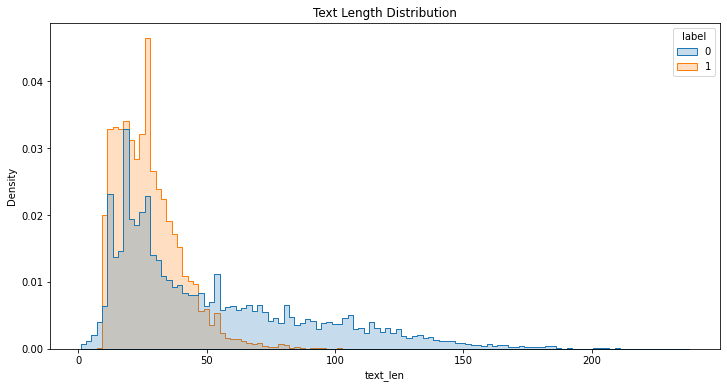

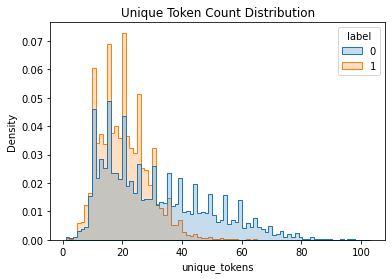

Most common bigrams for machine-generated texts: [((6, 2), 7384), ((0, 3), 7089), ((1, 0), 4895), ((0, 1), 4000), ((2, 0), 3923), ((3, 0), 3890), ((0, 0), 3488), ((3, 7), 3210), ((12, 2), 3008), ((2, 48), 2999)]
Most common bigrams for human-generated texts: [((0, 0), 8028), ((2, 0), 4209), ((0, 3), 3984), ((0, 1), 2109), ((3, 0), 2080), ((0, 7), 1690), ((5, 0), 1578), ((6, 2), 1577), ((7, 0), 1468), ((6, 0), 1459)]
top 10 important tokens by TFIDF [('12', 0.045508530466908156), ('17', 0.04186161099010504), ('16', 0.04144793065047611), ('48', 0.0351746863178206), ('18', 0.03336261611057995), ('10', 0.03200263508538248), ('15', 0.02953913762674253), ('19', 0.029048366701696842), ('33', 0.028545340590838457), ('13', 0.027114808082292646)]


In [11]:
EDA(df1)

Total Samples: 14900
0    12750
1     2150
Name: label, dtype: int64
Top 10 most common tokens[(0, 196810), (1, 156428), (2, 117530), (3, 93758), (4, 59652), (5, 54606), (8, 51197), (7, 46130), (6, 41385), (9, 35297)]


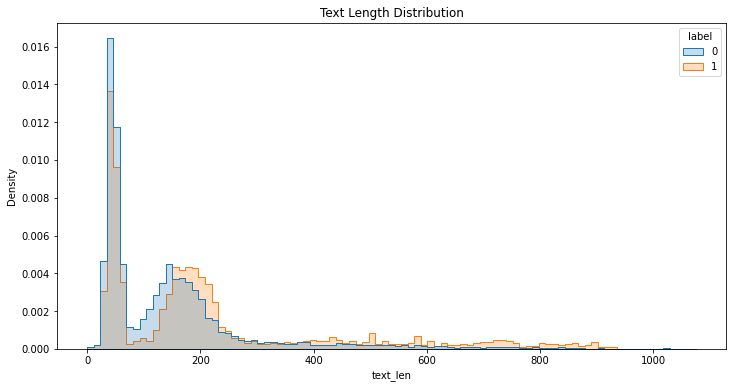

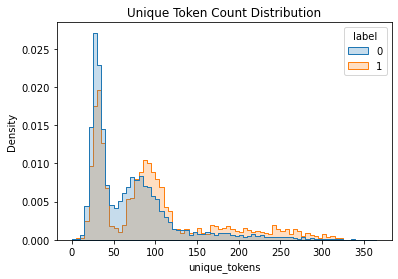

Most common bigrams for machine-generated texts: [((0, 1), 18914), ((2, 0), 16392), ((0, 0), 16079), ((0, 3), 15048), ((8, 15), 13880), ((1, 2), 12324), ((1, 11), 11272), ((5, 0), 8854), ((1, 14), 8571), ((6, 2), 8052)]
Most common bigrams for human-generated texts: [((0, 0), 6405), ((0, 1), 5606), ((0, 3), 5141), ((2, 0), 4937), ((8, 15), 3986), ((1, 2), 2671), ((3, 0), 2588), ((1, 0), 2514), ((5, 0), 2454), ((6, 2), 2075)]
top 10 important tokens by TFIDF [('11', 0.0984645603890659), ('14', 0.08560743695527513), ('10', 0.07771472206932399), ('27', 0.06416972031107544), ('13', 0.05966107061784775), ('21', 0.052254211256934406), ('36', 0.04856623037879699), ('25', 0.046883246719751685), ('12', 0.045526173494137886), ('20', 0.04542005328633193)]


In [12]:
EDA(df2)

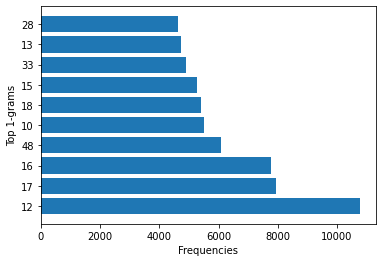

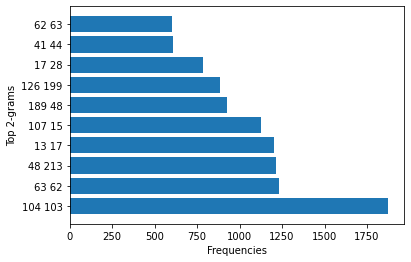

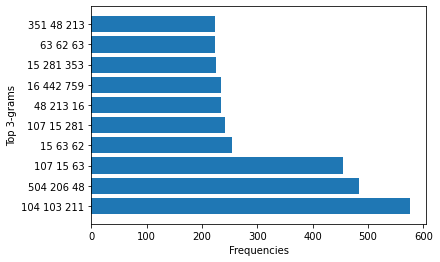

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import torch

# Sample data

# Convert the lists to string to work with CountVectorizer

# 1. N-gram Frequencies
def plot_top_ngrams(data, n=1):
    texts = [' '.join(map(str, item['text'])) for item in data]
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vec_texts = vectorizer.fit_transform(texts)
    sum_words = vec_texts.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    plt.barh(words, freqs)
    plt.xlabel('Frequencies')
    plt.ylabel(f'Top {n}-grams')
    plt.show()

plot_top_ngrams(data1, 1)
plot_top_ngrams(data1, 2)
plot_top_ngrams(data1, 3)


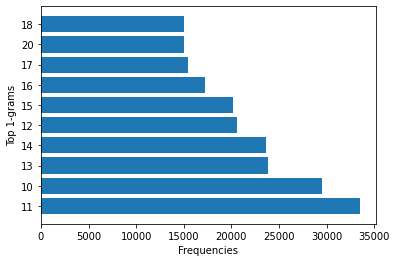

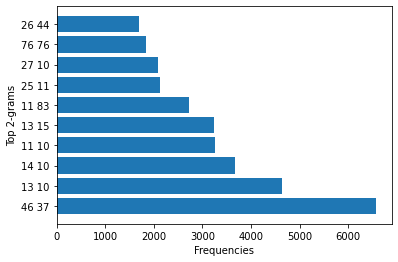

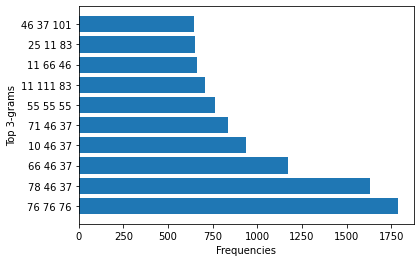

In [14]:
plot_top_ngrams(data2, 1)
plot_top_ngrams(data2, 2)
plot_top_ngrams(data2, 3)

### N gram (cont.)

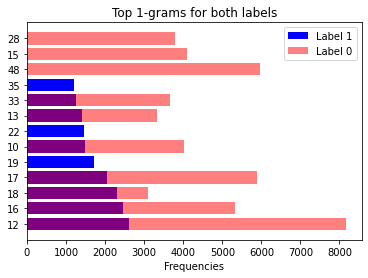

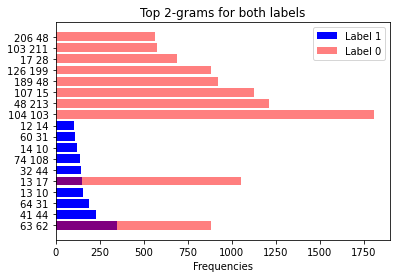

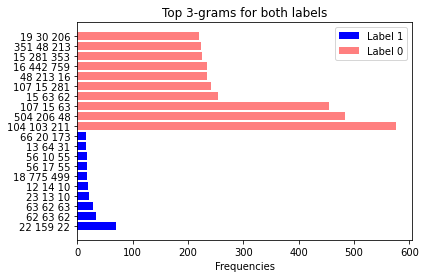

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import torch

# Sample data
# Assuming your data is something like this:
# data1 = [
#    {"text": [3147, 471, 4, ...], "label": 1},
#    ...
# ]

# Split data based on labels
data_label1 = [item for item in data1 if item["label"] == 1]
data_label0 = [item for item in data1 if item["label"] == 0]

def get_top_ngrams(data, n=1):
    texts = [' '.join(map(str, item['text'])) for item in data]
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vec_texts = vectorizer.fit_transform(texts)
    sum_words = vec_texts.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    return words, freqs

def plot_combined_ngrams(n=1):
    words1, freqs1 = get_top_ngrams(data_label1, n)
    words0, freqs0 = get_top_ngrams(data_label0, n)
    
    plt.barh(words1, freqs1, color='blue', label='Label 1')
    plt.barh(words0, freqs0, color='red', alpha=0.5, label='Label 0')
    plt.xlabel('Frequencies')
    plt.title(f'Top {n}-grams for both labels')
    plt.legend()
    plt.show()

# Plot combined graphs for 1-gram, 2-gram, and 3-gram
for n in [1, 2, 3]:
    plot_combined_ngrams(n)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Sample data structure
# data2 = [
#     {"text": [1, 2, 3, 4, 5], "label": 1},
#     {"text": [6, 7, 8, 9, 10], "label": 0},
#     # ... add other entries
# ]

# Convert the sequences to 3-gram strings
def to_3gram(sequence):
    return [''.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]

data2_3gram = [{"text": to_3gram(item['text']), "label": item['label']} for item in data1]

# Convert the 3-gram lists to space-separated string to work with CountVectorizer
texts = [' '.join(item['text']) for item in data2_3gram]
labels = [item['label'] for item in data2_3gram]

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a CountVectorizer instance
vectorizer = CountVectorizer(ngram_range=(1, 1))  # We use 1-gram here because our data is already in 3-gram format
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1943
           1       0.86      0.99      0.92      1957

    accuracy                           0.92      3900
   macro avg       0.93      0.92      0.92      3900
weighted avg       0.93      0.92      0.92      3900



In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Sample data structure
# data2 = [
#     {"text": [1, 2, 3, 4, 5], "label": 1},
#     {"text": [6, 7, 8, 9, 10], "label": 0},
#     # ... add other entries
# ]

# Convert the sequences to 3-gram strings
def to_3gram(sequence):
    return [''.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]

data2_3gram = [{"text": to_3gram(item['text']), "label": item['label']} for item in data2]

# Convert the 3-gram lists to space-separated string to work with CountVectorizer
texts = [' '.join(item['text']) for item in data2_3gram]
labels = [item['label'] for item in data2_3gram]

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a CountVectorizer instance
vectorizer = CountVectorizer(ngram_range=(1, 1))  # We use 1-gram here because our data is already in 3-gram format
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

('11', '15', '10', '13', '12', '14', '16', '17', '18', '21') (4680, 4483, 4280, 4231, 4098, 3768, 3555, 3210, 3127, 2667) ('11', '10', '14', '13', '12', '15', '16', '20', '17', '18') (28819, 25254, 19827, 19603, 16522, 15668, 13728, 12612, 12190, 11877)


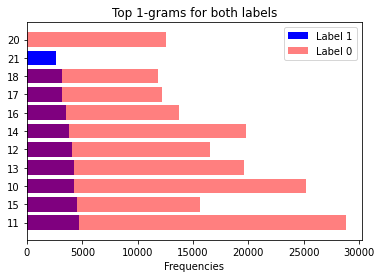

('46 37', '13 10', '13 15', '14 10', '107 15', '11 10', '14 23', '13 17', '11 83', '41 44') (939, 642, 587, 460, 373, 351, 318, 271, 268, 267) ('46 37', '13 10', '14 10', '11 10', '13 15', '11 83', '25 11', '27 10', '76 76', '25 25') (5629, 3993, 3200, 2901, 2654, 2453, 1982, 1818, 1771, 1511)


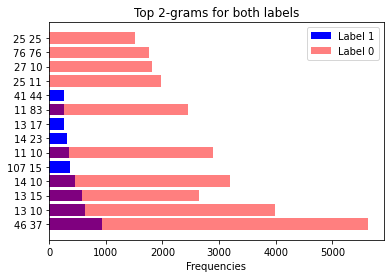

('78 46 37', '66 46 37', '10 46 37', '589 30 215', '507 46 37', '71 46 37', '11 66 46', '46 37 101', '13 15 28', '22 159 22') (237, 166, 107, 104, 94, 91, 84, 67, 58, 55) ('76 76 76', '78 46 37', '66 46 37', '10 46 37', '55 55 55', '71 46 37', '11 111 83', '25 11 83', '105 99 438', '438 105 99') (1739, 1396, 1003, 830, 759, 742, 680, 628, 626, 620)


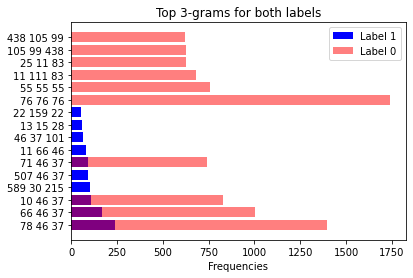

('11 66 46 37', '14 78 46 37', '168 15 589 30', '11 78 46 37', '11 507 46 37', '76 76 76 76', '15 589 30 215', '66 46 37 101', '13 10 46 37', '78 46 37 101') (84, 54, 48, 47, 45, 44, 43, 36, 35, 29) ('76 76 76 76', '55 55 55 55', '345 345 345 345', '438 105 99 438', '99 438 105 99', '105 99 438 105', '11 66 46 37', '11 78 46 37', '11 71 46 37', '66 46 37 101') (1728, 738, 612, 607, 603, 600, 580, 399, 329, 307)


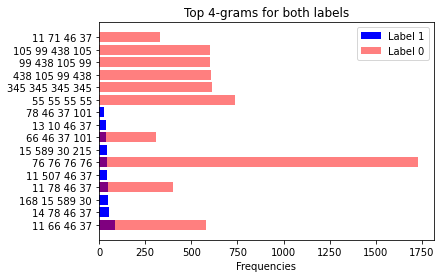

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import torch

# Sample data
# Assuming your data is something like this:
# data1 = [
#    {"text": [3147, 471, 4, ...], "label": 1},
#    ...
# ]

# Split data based on labels
data_label1 = [item for item in data2 if item["label"] == 1]
data_label0 = [item for item in data2 if item["label"] == 0]

def get_top_ngrams(data, n=1):
    texts = [' '.join(map(str, item['text'])) for item in data]
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vec_texts = vectorizer.fit_transform(texts)
    sum_words = vec_texts.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    return words, freqs

def plot_combined_ngrams(n=1):
    words1, freqs1 = get_top_ngrams(data_label1, n)
    words0, freqs0 = get_top_ngrams(data_label0, n)
    print(words1, freqs1, words0, freqs0)
    plt.barh(words1, freqs1, color='blue', label='Label 1')
    plt.barh(words0, freqs0, color='red', alpha=0.5, label='Label 0')
    plt.xlabel('Frequencies')
    plt.title(f'Top {n}-grams for both labels')
    plt.legend()
    plt.show()

# Plot combined graphs for 1-gram, 2-gram, and 3-gram
for n in [1, 2, 3, 4]:
    plot_combined_ngrams(n)


('168 15 589 30 215', '76 76 76 76 76', '11 66 46 37 101', '30 4734 38 3503 164', '25 11 66 46 37', '2765 1932 30 4734 38', '1932 30 4734 38 3503', '11 78 46 37 101', '3628 16 1488 470 4046', '11 66 46 37 176') (43, 43, 25, 22, 19, 19, 19, 9, 9, 9) ('76 76 76 76 76', '55 55 55 55 55', '345 345 345 345 345', '105 99 438 105 99', '99 438 105 99 438', '438 105 99 438 105', '1042 1042 1042 1042 1042', '459 459 459 459 459', '11 66 46 37 101', '238 25 238 25 238') (1718, 725, 609, 596, 590, 582, 282, 250, 245, 203)


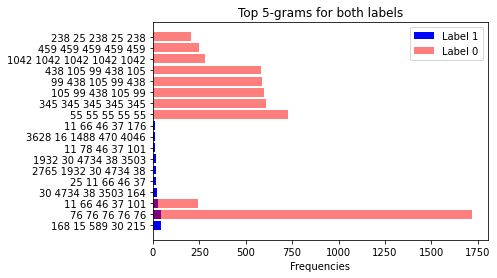

In [ ]:

plot_combined_ngrams(5)

### PCA

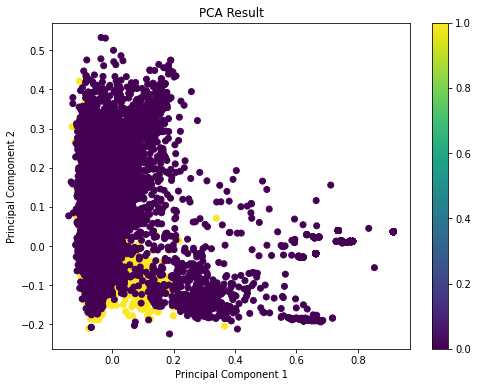

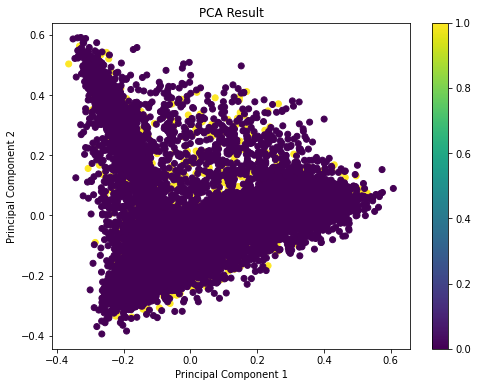

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(df):
    X = list(df['text'].apply(lambda x: ' '.join(map(str, x))))
    vectorizer = TfidfVectorizer(max_features=1000)
    X_tfidf = vectorizer.fit_transform(X).toarray()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_tfidf)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['label'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.colorbar()
    plt.show()

plot_pca(df1)
plot_pca(df2)

In [ ]:
!pip install plotly

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [33]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_pca_3d(df):
    X = list(df['text'].apply(lambda x: ' '.join(map(str, x))))
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
    X_tfidf = vectorizer.fit_transform(X).toarray()

    # Change the number of components to 3 for 3D plotting
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(X_tfidf)
    
    # Create a DataFrame for plotly's input
    result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
    result_df['label'] = df['label']
    result_df['model'] = df['model']
    # result_df['domain'] = df['domain']

    # Use plotly's express scatter_3d function
    fig = px.scatter_3d(result_df, x='PC1', y='PC2', z='PC3', color='model', opacity=1)
    
    # Some optional customization
    fig.update_layout(title="PCA 3D Result")#, margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

# Plot for each dataframe
# plot_pca_3d(df1)
# plot_pca_3d(df2)
plot_pca_3d(df2)


In [19]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_pca_3d_domain(df):
    X = list(df['text'].apply(lambda x: ' '.join(map(str, x))))
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
    X_tfidf = vectorizer.fit_transform(X).toarray()

    # Change the number of components to 3 for 3D plotting
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(X_tfidf)
    
    # Create a DataFrame for plotly's input
    result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
    result_df['label'] = df['label']
    result_df['domain'] = df['domain']
    # result_df['domain'] = df['domain']

    # Use plotly's express scatter_3d function
    fig = px.scatter_3d(result_df, x='PC1', y='PC2', z='PC3', color='domain', opacity=1)
    
    # Some optional customization
    fig.update_layout(title="PCA 3D Result")#, margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

# Plot for each dataframe
# plot_pca_3d(df1)
# plot_pca_3d(df2)


In [20]:
plot_pca_3d_domain(df3)